# The Gibbs phenomenon

The Fourier series of a periodic function with fine jumps presents oscillations close to the discontinuities.
For example, the square wave defined by the odd-extension of $ f(x)=1 $ for $ 0<x<1 $ (namely let $ f(x)=-1 $ for $ -1<x<0 $, and repeat periodically the pattern) is
$$
f(x)=\frac4\pi \sum_{n\in\mathbb{Z_+}} \frac1{2n+1} \sin((2n+1)\pi x)
$$

In this notebook we will explore the Gibbs phenomenon plotting truncated sums of the above series (and of the series for the odd extension of $f(x) = 1-x$).

In [1]:
# preliminary inclusions
import numpy as np

from matplotlib import pyplot as plt
from scipy import linspace

In [2]:
class PartialSum:
    def __init__(self, f, n):
        self.n = n
        # an index is already shifted: a_1 == an[0], a_k == an[k-1]
        self.an = [f(n) for n in range(1,self.n+1)]

    def __call__(self, x):
        return sum(self.an[n] * np.sin((n+1)*np.pi*x) for n in range(0,self.n))

In [3]:
def plot_fn(an, ran, steps, xlim=None, ylim=None, pts=200):
    x0, xl = ran
    x = linspace(x0, xl, pts)
    f = PartialSum(an, steps)
    
    if xlim or ylim:
        plt.figure(figsize=(14,4))
        ax1 = plt.subplot(121)
        ax1.plot(x, f(x))
        ax1.set_title("Truncated to $a_{{{}}}$".format(steps))
    
        ax2 = plt.subplot(122)
        if xlim:
            ax2.set_xlim(xlim)
        if ylim:
            ax2.set_ylim(ylim)
        ax2.plot(x, f(x))
    else:
        plt.plot(x, f(x))
    
    plt.show()

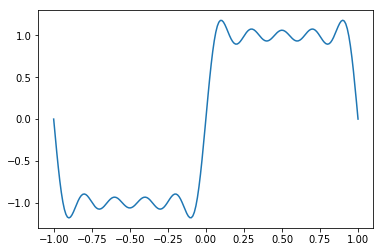

In [4]:
def an_const_one(n):
    "Coefficient a_n = 4/(n*pi) if n is odd and 0 oterwise for the odd extension of f=1 in (0,1)"
    return 0.0 if n % 2 == 0 else 4. / (np.pi * n)

plot_fn(an_const_one, (-1,1), 10)

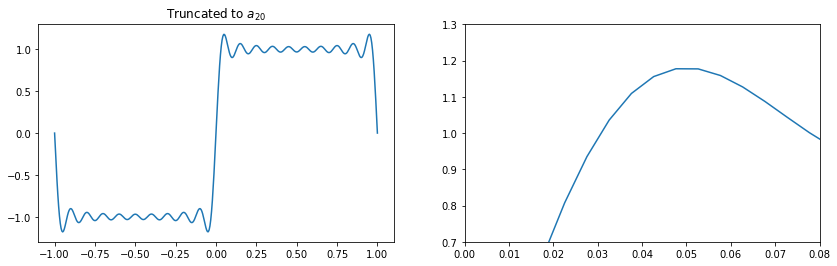

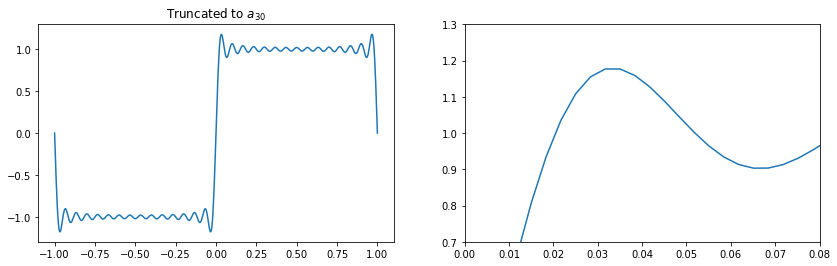

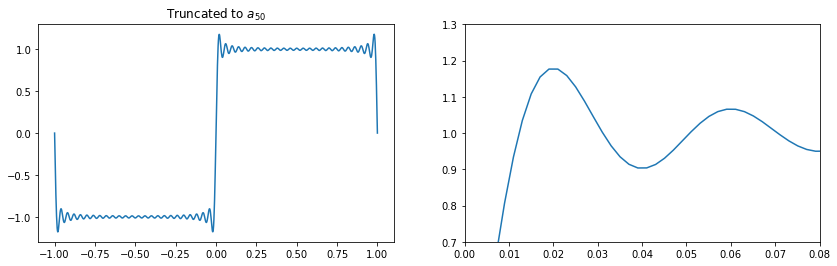

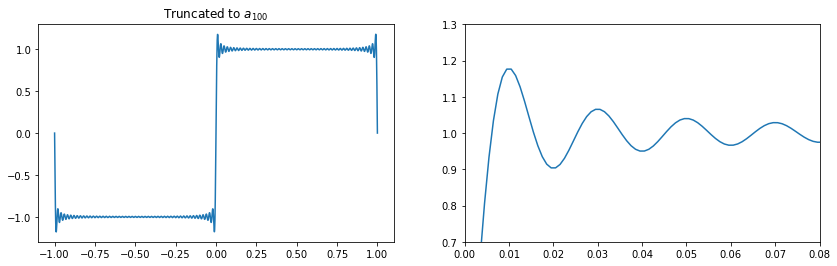

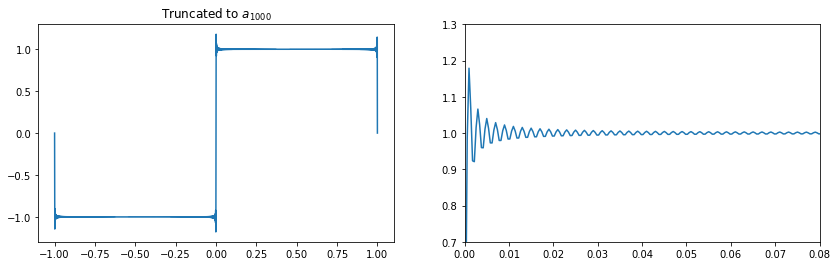

In [5]:
for steps in (20, 30, 50, 100, 1000):
    plot_fn(an_const_one, (-1,1), steps, xlim=(0,0.08), ylim=(0.7, 1.3), pts=min(steps*20, 5000))

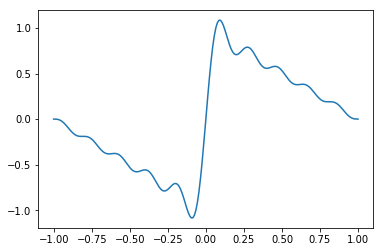

In [6]:
def an_one_minus_x(n):
    "Coefficient a_n = 2/(n*pi) if n is odd and 0 oterwise for the odd extension of f=1 in (0,1)"
    return 2.0/(n*np.pi)

plot_fn(an_one_minus_x, (-1,1), 10)

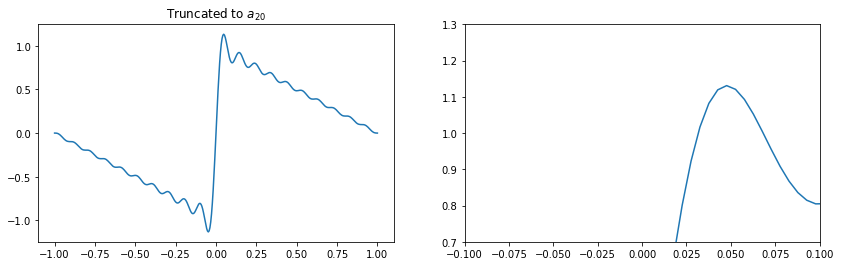

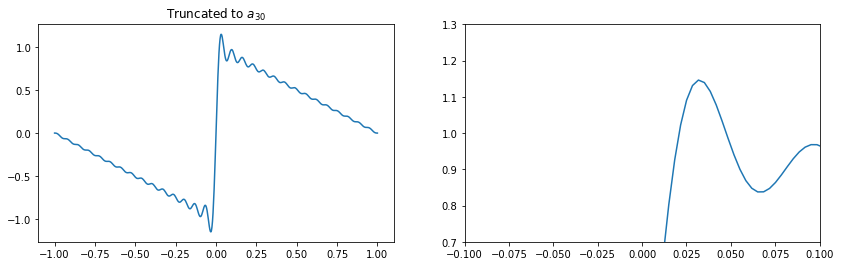

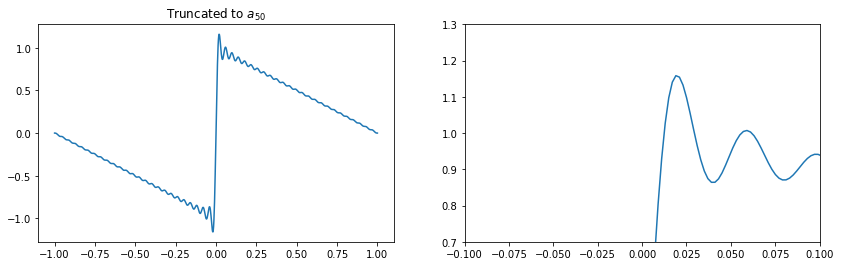

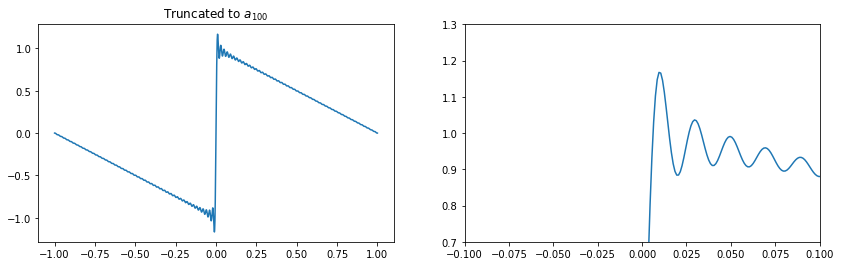

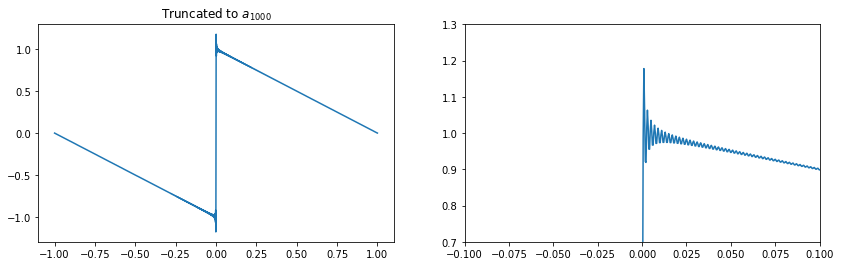

In [7]:
for steps in (20, 30, 50, 100, 1000):
    plot_fn(an_one_minus_x, (-1,1), steps, xlim=(-0.1,0.1), ylim=(0.7, 1.3), pts=min(steps*20, 5000))